In [2]:
import gym
import numpy as np
import pygame 
import matplotlib.pyplot as plt

C:\Users\bejao\miniconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode:0,total steps:200,Total Reward:-560
Episode:1,total steps:200,Total Reward:-497
Episode:2,total steps:200,Total Reward:-578
Episode:3,total steps:200,Total Reward:-596
Episode:4,total steps:200,Total Reward:-551
Episode:5,total steps:200,Total Reward:-416
Episode:6,total steps:200,Total Reward:-479
Episode:7,total steps:200,Total Reward:-407
Episode:8,total steps:200,Total Reward:-524
Episode:9,total steps:200,Total Reward:-569
Episode:10,total steps:200,Total Reward:-623
Episode:11,total steps:200,Total Reward:-533
Episode:12,total steps:200,Total Reward:-542
Episode:13,total steps:200,Total Reward:-272
Episode:14,total steps:200,Total Reward:-452
Episode:15,total steps:200,Total Reward:-380
Episode:16,total steps:200,Total Reward:-416
Episode:17,total steps:200,Total Reward:-443
Episode:18,total steps:200,Total Reward:-470
Episode:19,total steps:200,Total Reward:-479
Episode:20,total steps:200,Total Reward:-272
Episode:21,total steps:200,Total Reward:-236
Episode:22,total ste

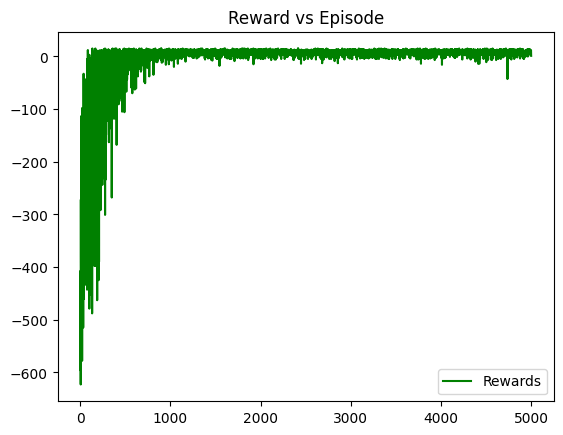

In [3]:
pygame.init()
env=gym.make("Taxi-v3")

Q=np.zeros((env.observation_space.n,env.action_space.n))


gamma=0.99
alpha=0.1 
epsilon=0.1
epsilon_decay=0.9999
epsilon_min=0.01
episodes=10000
rew=[]


for episode in range(episodes):
    state,_=env.reset()
    total_reward=0
    done=False
    steps=0
    
    
    while not done:
        if np.random.random()<epsilon:
            action=env.action_space.sample()
        else:
            action=np.argmax(Q[state,:])
        epsilon=max(epsilon*epsilon_decay,epsilon_min)
        
        next_state,reward,terminated,truncated,_=env.step(action)
        done=terminated or truncated
        
        old_Q=Q[state,action]
        next_max_q=np.max(Q[next_state,:])
        new_Q=(1-alpha)*old_Q+alpha*(reward+gamma*next_max_q)# the bellman equation
        Q[state,action]=new_Q
        
        
        state=next_state
        total_reward+=reward
        steps+=1
        
        
    print(f'Episode:{episode},total steps:{steps},Total Reward:{total_reward}')
    rew.append(total_reward)
    
#let's just save the Q_table
np.save('q_table.npy',Q)
print("Q-table saved:")

env.close()


x=np.linspace(0,5000,episodes)
plt.plot(x,rew,c='g')
plt.legend(['Rewards'])
plt.X_label='Episode'
plt.Y_label='Reward'
plt.title(f'Reward vs Episode')
plt.show()

In [2]:
import gym
import pygame
import numpy as np
pygame.init()
env=gym.make("Taxi-v3",render_mode="human")
Q=np.load('q_table.npy')
while 1==1:
    state,_=env.reset()
    done=False
    total_reward=0
    
    while not done:
        
        action=np.argmax(Q[state,:])
        state,reward,terminated,truncated,_=env.step(action)
        done=terminated or truncated
        total_reward+=reward
        env.render()
        
    print(f"Test episode total reward: {total_reward}")


env.close()

Test episode total reward: 10
Test episode total reward: 12
Test episode total reward: 7
Test episode total reward: 9
Test episode total reward: 4
Test episode total reward: 6


KeyboardInterrupt: 